<a href="https://colab.research.google.com/github/shannonlal/Statistical-YCBS-255/blob/main/Assignment03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Assignment 3  <font color="blue"> (15 points) </font>
 
***

### Notes and Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [1]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [2]:
# Imports for workbook
# Load Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_validate, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso
from math import sqrt
from sklearn.metrics import r2_score, get_scorer, make_scorer, mean_squared_error
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from google.colab import files
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Part A** <font color="blue">(5 points)</font>

1. **<font color="blue">(1 point)</font>** Generate 100 points equally distanced from $-20$ to $20$ and save them in a `numpy` array `x1`. Now, create $4$ more `numpy` arrays by raising `x1` to the power of $2,3,4,5$, and call them `x2`, `x3`, `x4` and `x5`, respectively. 
3. **<font color="blue">(1 point)</font>** Create your response `y`, a new `numpy` array, defined as $y= 1.75 + 5 x_1 + 0.05 x_3 - 10.3 x_5 + \varepsilon$, where $\varepsilon \sim \mathcal{N}(0, 4)$.
4. **<font color="blue">(2 points)</font>** Using $5$-fold cross-validation, with a reasonable train-test proportion, train a **lasso** regression model including all $x_1, x_2, x_3 , x_4 , x_5$, and for $10$ different  pre-determined tuning parameters. 
5. **<font color="blue">(1 point)</font>** Plot the **cross-validated mean squared errors** vs the tuning parameter's values
 and chose the best tuning parameter based on the plot. Does the best model chosen perform **variable selection**?

In [3]:
# Part A Generate 100 points equally distanced from  −20  to  20  and save them in a numpy array x1. 
#Now, create  4  more numpy arrays by raising x1 to the power of  2,3,4,5 , and call them x2, x3, x4 and x5, 
# respectively.
x1 = np.linspace( -20, 20, 100 )
x1 = np.array( x1 ).reshape( -1,1)

x2 = pow ( x1, 2)
x3 = pow ( x1, 3)
x4 = pow ( x1, 4)
x5 = pow ( x1, 5)

In [4]:
# Part A, Q2: Create your response y, a new numpy array, defined as 𝑦=1.75+5𝑥1+0.05𝑥3−10.3𝑥5+𝜀, where  𝜀∼(0,4)
# This function follows the generic formula:
# y = B0 + B1x1 + B2x3 + B3x5 + 𝜀

## Define known constants
B0 = 1.75
B1 = 5
B3 = 0.05
B5 = -10.3

## Calculate 𝜀 with a normal distribution with mean of 0 and standard deviation of 4
## We will use the formula from numpy to get a normal distribution
## np.random.normal (p)
## We need 3 variables: mean, standard deviation spread, size
## Size: is 100
## mean = 0
## standard deviation: sqrt(4)
size = 100
mu = 0
std_dev = sqrt(4)
np.random.seed(1)     # Fixing a seed
e = np.random.normal(mu, std_dev, size)
e = np.array(e).reshape(-1,1)

y = B0 + B1*x1 + B3*x3 + B5*x5 + e

#Configure data
combined_data = np.concatenate((y,x1,x2,x3,x4,x5), axis = 1)
X = combined_data[:, 1:6]
y = combined_data[:,0]


Part A - Q3 

Using  5 -fold cross-validation, with a reasonable train-test proportion, train a lasso regression model including all  𝑥1,𝑥2,𝑥3,𝑥4,𝑥5 , and for  10  different pre-determined tuning parameters.

**Process**

Note: Follow workbook 4 but replaced with Lasso instead of Logistic Regression
1. We need to merge the different arrays into a main array
2. Need to define 10 different pre-determined tuning parameters
3. We need to split the detail using k fold and calculate accuracy

Process for splitting and calculating accuracy 
1. Using K-Fold split the data into train and test 5 times
2. For test and train

In [5]:

# Split your data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

# Scale the data
# Note: After conversation with TA it was recommended to not scale here.  

## Build a set of 10 tuning parameters between 0.001 and 1500
## Note: I know that it said only 10; however, it took a bit of 
## investigation to adjust the tuning parameter to get it to 
## the curve that works.  I decided to leave it at 100 
## as it didn't seem to impact speed
tuning_parameters = np.linspace(.001,400,100) 

## Model scoring.  Discuss with TA during tutorial and recommended this scoring
scoring = 'neg_mean_squared_error'
scorer = get_scorer(scoring)

## Variables to hold data
validation_scores = []
train_scores = []
results_list = []
test_scores = []

model = Lasso()
param = {'alpha': tuning_parameters}

## Loop through the tuning parameters and train and evaluate the model
for t_param in tuning_parameters:
  model = Lasso( alpha = t_param)

  rst_cross_validation = cross_validate(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5, return_train_score = True)

  # Storing the validation, train and test scores to use to build a graph
  validation_scores.append(np.mean(rst_cross_validation['test_score']))
  train_scores.append(np.mean(rst_cross_validation['train_score']))
  results_list.append(rst_cross_validation)

  ## Fit the model against the scaled training data
  model.fit(X_train,y_train)

  y_pred = model.predict(X_test)
  test_scores.append(scorer(model, X_test, y_test))


Lasso(alpha=0.001)

Lasso(alpha=4.04139393939394)

Lasso(alpha=8.081787878787878)

Lasso(alpha=12.122181818181817)

Lasso(alpha=16.16257575757576)

Lasso(alpha=20.2029696969697)

Lasso(alpha=24.243363636363636)

Lasso(alpha=28.283757575757576)

Lasso(alpha=32.32415151515151)

Lasso(alpha=36.36454545454545)

Lasso(alpha=40.404939393939394)

Lasso(alpha=44.44533333333333)

Lasso(alpha=48.48572727272727)

Lasso(alpha=52.52612121212121)

Lasso(alpha=56.56651515151515)

Lasso(alpha=60.60690909090909)

Lasso(alpha=64.64730303030304)

Lasso(alpha=68.68769696969697)

Lasso(alpha=72.72809090909091)

Lasso(alpha=76.76848484848486)

Lasso(alpha=80.8088787878788)

Lasso(alpha=84.84927272727273)

Lasso(alpha=88.88966666666667)

Lasso(alpha=92.93006060606061)

Lasso(alpha=96.97045454545454)

Lasso(alpha=101.0108484848485)

Lasso(alpha=105.05124242424243)

Lasso(alpha=109.09163636363637)

Lasso(alpha=113.1320303030303)

Lasso(alpha=117.17242424242424)

Lasso(alpha=121.2128181818182)

Lasso(alpha=125.25321212121213)

Lasso(alpha=129.29360606060607)

Lasso(alpha=133.334)

Lasso(alpha=137.37439393939394)

Lasso(alpha=141.41478787878788)

Lasso(alpha=145.4551818181818)

Lasso(alpha=149.49557575757575)

Lasso(alpha=153.53596969696972)

Lasso(alpha=157.57636363636365)

Lasso(alpha=161.6167575757576)

Lasso(alpha=165.65715151515153)

Lasso(alpha=169.69754545454546)

Lasso(alpha=173.7379393939394)

Lasso(alpha=177.77833333333334)

Lasso(alpha=181.81872727272727)

Lasso(alpha=185.8591212121212)

Lasso(alpha=189.89951515151515)

Lasso(alpha=193.93990909090908)

Lasso(alpha=197.98030303030305)

Lasso(alpha=202.02069696969698)

Lasso(alpha=206.06109090909092)

Lasso(alpha=210.10148484848486)

Lasso(alpha=214.1418787878788)

Lasso(alpha=218.18227272727273)

Lasso(alpha=222.22266666666667)

Lasso(alpha=226.2630606060606)

Lasso(alpha=230.30345454545454)

Lasso(alpha=234.34384848484848)

Lasso(alpha=238.38424242424244)

Lasso(alpha=242.42463636363638)

Lasso(alpha=246.46503030303032)

Lasso(alpha=250.50542424242425)

Lasso(alpha=254.5458181818182)

Lasso(alpha=258.5862121212121)

Lasso(alpha=262.62660606060604)

Lasso(alpha=266.667)

Lasso(alpha=270.7073939393939)

Lasso(alpha=274.74778787878785)

Lasso(alpha=278.7881818181818)

Lasso(alpha=282.8285757575757)

Lasso(alpha=286.86896969696966)

Lasso(alpha=290.9093636363636)

Lasso(alpha=294.94975757575753)

Lasso(alpha=298.99015151515147)

Lasso(alpha=303.03054545454546)

Lasso(alpha=307.0709393939394)

Lasso(alpha=311.11133333333333)

Lasso(alpha=315.15172727272727)

Lasso(alpha=319.1921212121212)

Lasso(alpha=323.23251515151514)

Lasso(alpha=327.2729090909091)

Lasso(alpha=331.313303030303)

Lasso(alpha=335.35369696969695)

Lasso(alpha=339.3940909090909)

Lasso(alpha=343.43448484848483)

Lasso(alpha=347.47487878787877)

Lasso(alpha=351.5152727272727)

Lasso(alpha=355.55566666666664)

Lasso(alpha=359.5960606060606)

Lasso(alpha=363.6364545454545)

Lasso(alpha=367.67684848484845)

Lasso(alpha=371.7172424242424)

Lasso(alpha=375.7576363636363)

Lasso(alpha=379.79803030303026)

Lasso(alpha=383.8384242424242)

Lasso(alpha=387.87881818181813)

Lasso(alpha=391.9192121212121)

Lasso(alpha=395.95960606060606)

Lasso(alpha=400.0)

<Figure size 576x576 with 0 Axes>

Text(0.5, 0, 'Alpha')

Text(0, 0.5, 'neg_mean_squared_error')

Text(0.5, 1.0, 'LASSO')

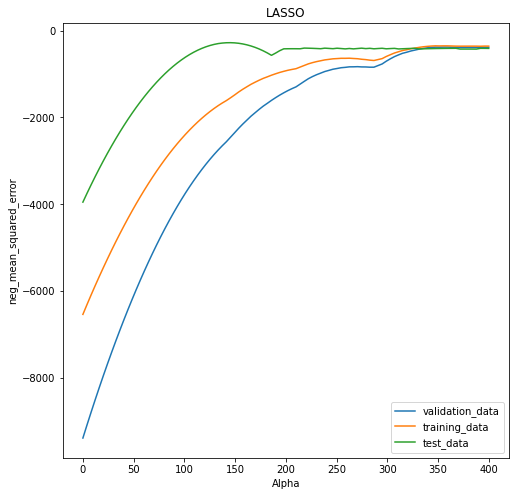

In [6]:
# QA - Part 4 Plot the cross-validated mean squared errors vs the tuning parameter's values and chose the best tuning parameter based on the plot. 
# Does the best model chosen perform variable selection?

plt.figure(figsize = (8,8))
sns.lineplot(y = validation_scores, x = tuning_parameters, label = 'validation_data')
sns.lineplot(y = train_scores, x = tuning_parameters, label = 'training_data')
sns.lineplot(y = test_scores, x = tuning_parameters, label = 'test_data')
plt.xlabel('Alpha')
plt.ylabel(scoring)
plt.title('LASSO')
plt.legend()
plt.show()

In [7]:
# Part A : Summary
## Based on the summary above it looks like a tuning parameter of alpha = 150 is giving the best result.
## Will rebuild the model to get the intercept
lasso_model = Lasso( alpha = 150)

rst_cross_validation = cross_validate(lasso_model, X_train, y_train, scoring='neg_mean_squared_error', cv=5, return_train_score = True)

lasso_model.fit(X_train,y_train)

print(bcolors.RED + "\nIntercept: "+str(lasso_model.intercept_)+ bcolors.ENDC)
print(bcolors.RED + "\nCoefficent:s "+str(lasso_model.coef_)+ bcolors.ENDC)


Lasso(alpha=150)


Intercept: 0.89094147994183

Coefficent:s [ 5.30905679e+00 -0.00000000e+00  2.02553363e-02 -2.50801736e-06
 -1.02999144e+01]


**Question A Summary:**

Based on the above graph it looks like a tuning parameter of alpha = 150 is is the value that gives the least error.  During the tutorial the TAs mentioned that the tuning parameter seems high; however, we seem to be getting values close to the original formula:

𝑦=1.75+5𝑥1+0.05𝑥3−10.3𝑥5+𝜀 , where  𝜀∼(0,4) .

I we trained the model, and got the following values for the scaled intercept:

**B0** = 0.891


I got the following values for the coefficents:

**B1**: 5.30905679e+00

**B2**: 0.00000000e+00 

**B3**: 2.02553363e-0  

**B4**: -2.50801736e-06 (note close to 0)

**B5**: -1.02999144e+01 (i.e. close to -10.3)


The values we are getting seem to be closed to the predicted coefficents in the original equation.






## **Part B** <font color="blue">(3 points)</font>
For this part upload `Wage.csv`.

1. **<font color="blue">(2 points)</font>** Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree $d$ for the polynomial. What degree was chosen? Make a plot of
the resulting polynomial fit to the data. 
2. **<font color="blue">(1 point)</font>** Fit a step function to predict `wage` using `age` , and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained.


In [8]:
# Part B - Load Wage data
uploaded = files.upload()

# Look at workbook 6 for polynimal Regression

Saving Wage.csv to Wage.csv


In [9]:
## Analyze the data and treat
wage_data = pd.read_csv('Wage.csv')
wage_data.drop(columns=['Unnamed: 0'], inplace=True)
wage_data.head()

# Print the shape
print( wage_data.shape)

# Describe the data
print( wage_data.describe() )


,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


(3000, 12)
              year          age      logwage         wage
count  3000.000000  3000.000000  3000.000000  3000.000000
mean   2005.791000    42.414667     4.653905   111.703608
std       2.026167    11.542406     0.351753    41.728595
min    2003.000000    18.000000     3.000000    20.085537
25%    2004.000000    33.750000     4.447158    85.383940
50%    2006.000000    42.000000     4.653213   104.921507
75%    2008.000000    51.000000     4.857332   128.680488
max    2009.000000    80.000000     5.763128   318.342430


In [11]:
# Part B. Q 1: Perform polynomial regression to predict wage using age. Use cross-validation to select the optimal degree  𝑑  for the polynomial. 
# What degree was chosen? Make a plot of the resulting polynomial fit to the data.

data_x = wage_data['age']   # indep. var.
data_y = wage_data['wage']  # depend. var.

# Split the data using 33% split
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, test_size=0.33, random_state = 1)
x_train = np.array(train_x).reshape(-1,1) 

## Define local variables to keep the data in sync
validation_scores = []
train_scores = []
results_list = []
test_scores = []
## Build a a range of polynomials with different degrees and evaluate the validation scores
degrees = [2,3,4,5,6,7,8,9,10]

## Define the K-Fold split fold split for the data
k = 5

def determine_validation_score( x_train, y_train, d, k, validation_scores, train_scores ): 
  # Solution from Workbook on building polynomials 
  poly= PolynomialFeatures(degree=d)
  X_poly = poly.fit_transform(x_train)
  poly.fit(X_poly, y_train)
  model = LinearRegression()
  k_fold = KFold(n_splits = k)

  rst_cross_validation = cross_validate(model, X_poly, train_y, cv=k_fold, return_train_score = True)

  validation_scores.append(np.mean(rst_cross_validation['test_score']))
  train_scores.append(np.mean(rst_cross_validation['train_score']))
# Solution:
for i in degrees:
  # Calculate for the validation score for each degree
  determine_validation_score(x_train, train_y, i, k, validation_scores, train_scores )
      

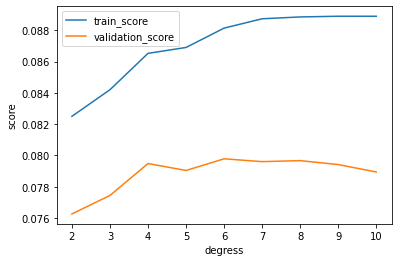

In [12]:
## Build a plot of the degrees vs valiation score to determine the appropriate value
plt.plot(degrees, train_scores , label = 'train_score')
plt.plot(degrees, validation_scores , label = 'validation_score')
plt.legend()
plt.xlabel('degress')
plt.ylabel('score');

**Part B Question 1 Summary**

From the above plot we can see that the gap between train and test scors start increasing after 4; therefore, the optimial degree for the polynomial is degree = 4

In [13]:
# Part B. Q 2: Fit a step function to predict wage using age , and perform cross-validation to choose the optimal number of cuts. 
# Make a plot of the fit obtained.

# Solution.  
## To find the optimal number of cuts, we are going to need to create mutliple step functions that predict the wage using age. 
## I will follow a similar process as above and create a function to predict the age and calculate the RSME for each cut
## Once I have tried this I will plot a graph of RMSE for each cut
## NOTE: Referenced step function solution in Workbook 6
def determine_rmse_by_cut (x_train, y_test, test_x, n, test_scores):
  df_cut, bins = pd.cut(train_x, n, retbins=True, right=True)
  df_steps = pd.concat([train_x, df_cut, train_y], keys=['age','age_cuts','wage'], axis=1)
  df_steps_dummies = pd.get_dummies(df_cut)
    
  # Fit the data
  fit = sm.GLM(df_steps.wage, df_steps_dummies).fit()

  # Binning validation set into same n bins
  bin_mapping = np.digitize(test_x, bins) 
  X_valid = pd.get_dummies(bin_mapping)

  # Removing any outliers
  X_valid = pd.get_dummies(bin_mapping).drop([n], axis=1)# Prediction

  # Predict the data and calculate RMSE
  pred = fit.predict(X_valid)
  rms = sqrt(mean_squared_error(test_y, pred)) 
  test_scores.append(rms) 

# Local variables
test_scores = []
# Start with 2-10 cuts
num_cuts = [2,3,4,5,6,7,8,9,10]

for n in num_cuts:
  determine_rmse_by_cut(x_train, test_y, test_x, n, test_scores)





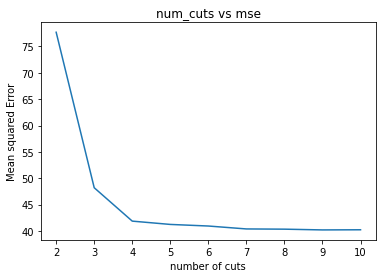

In [14]:
## Build a plot of the number of cuts vs Mean Squared Error to determine the appropriate number of cuts

plt.xlabel('number of cuts')
plt.ylabel('Mean squared Error')
plt.title('num_cuts vs mse')
plt.plot(num_cuts , test_scores);

**Part B Question 2 Summary**

From the above plot we can see that the break point is at cuts = 4, hence we choose the optimal cuts as 4


## **Part C** <font color="blue">(4 points)</font>
Apply SVM and random forests to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to each other? Which of them yields the best performance?


In [15]:
# Part C - Load Wine Data
uploaded = files.upload()


Saving wine_255.csv to wine_255.csv


In [16]:
## Load the wine data and drop unnamed column
wine_data = pd.read_csv("wine_255.csv")
wine_data.drop(['Unnamed: 0'], axis=1, inplace=True)

wine_data.head()

wine_data.describe()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,2
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,2
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,2
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,2


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_category
count,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000,6463.000000
mean,7.217755,0.339589,0.318758,5.443958,0.056056,30.516865,115.694492,0.994698,3.218332,0.531150,10.492825,2.177626
std,1.297913,0.164639,0.145252,4.756852,0.035076,17.758815,56.526736,0.003001,0.160650,0.148913,1.193128,0.858450
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992330,3.110000,0.430000,9.500000,2.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,2.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.997000,3.320000,0.600000,11.300000,3.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,4.000000


In [17]:
## From workbook 9 execerise, use one hot encoding to replace type with 0 or 1
enc = OneHotEncoder(handle_unknown='ignore')
endode_data = [['red', 1], ['white', 0]]
wine_data['red_wine'] = pd.get_dummies(wine_data['type'])['red']

In [18]:
## Remove duplicates as discussed in the coding section
print(wine_data.shape)
wine_data.drop_duplicates( inplace=True)

print(wine_data.shape)

print(wine_data.head)

print(bcolors.RED + "Number of White Wines: "+ str(wine_data['type'].value_counts().white) + " Number of Red Wines: " + str(wine_data['type'].value_counts().red) + bcolors.ENDC)
print(bcolors.RED + "Unique Values for Quality Category" + str(wine_data['quality_category'].unique()))

(6463, 14)
(5295, 14)
<bound method NDFrame.head of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6457    red            6.3             0.510         0.13             2.3   
6458    red            6.8             0.620         0.08             1.9   
6459    red            6.2             0.600         0.08             2.0   
6461    red            5.9             0.645         0.12             2.0   
6462    red            6.0             0.310         0.47             3.6   

      chlorides  free s

In [19]:
## Split the data into test and train
y = wine_data['quality_category']
X = wine_data.drop(['quality_category', 'type'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print(bcolors.RED + "Shape of Training set : "+ bcolors.ENDC, X_train.shape)
print(bcolors.RED + "Shape of test set : "+ bcolors.ENDC, X_test.shape)
print(bcolors.RED + "Percentage of classes in training set:" + bcolors.ENDC,y_train.value_counts(normalize=True))
print(bcolors.RED + "Percentage of classes in test set:" + bcolors.ENDC,y_test.value_counts(normalize=True))


Shape of Training set :  (3706, 12)
Shape of test set :  (1589, 12)
Percentage of classes in training set: 2    0.433621
3    0.327847
1    0.164868
4    0.045602
0    0.028063
Name: quality_category, dtype: float64
Percentage of classes in test set: 2    0.443046
3    0.333543
1    0.151668
4    0.040906
0    0.030837
Name: quality_category, dtype: float64


**Solution**

For each classifier we use (SVM and Random Forest) we need to compare the performance of each model against the test data.
The following is the steps that will be followed:
1. Scale the data (TA recommended in class to make model faster)
2. Build a model using the classifier (SVM and Random Forest)
3. Fit the model using the train data
4. Predict the model using the test the data
5. calculate metrics to gauge performance.
5i.  Check confusion matrix, heatmap to compare

In [20]:
## Create a function to evaluate the results of the different models (i.e SVM and Random Forest)
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


In [21]:
## Scale the data
scalar = StandardScaler()

x_traning_scalar = scalar.fit_transform( X_train)
x_test_scalar = scalar.transform( X_test )

x_traning_scalar.shape, x_test_scalar

((3706, 12), array([[-0.62623239,  2.67220943, -1.91924378, ...,  0.79068874,
         -0.11775283,  1.72646053],
        [ 3.27650823,  0.76124053,  0.81710086, ...,  2.20661469,
         -0.53892912,  1.72646053],
        [-0.17591617, -0.43311503,  2.86935934, ..., -0.49038712,
         -1.12857592, -0.57921973],
        ...,
        [-0.40107428, -0.67198614, -0.41425423, ...,  0.18386333,
         -0.87587015, -0.57921973],
        [ 0.12429465, -0.43311503,  1.36436979, ...,  0.5884136 ,
         -0.42661544, -0.57921973],
        [-1.52686485, -0.01509058,  0.33824055, ..., -0.82751235,
          1.65118758, -0.57921973]]))

**Note:** 

Additional step demonstrated in tutorial class.  Will use GRID Search to determine the optimal parameters for the model

GridSearchCV(estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 30, 35]})


SVM Best Parameters: {'C': 10}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.00      0.00      0.00       241
           2       0.51      0.74      0.60       704
           3       0.59      0.62      0.60       530
           4       0.00      0.00      0.00        65

    accuracy                           0.53      1589
   macro avg       0.22      0.27      0.24      1589
weighted avg       0.42      0.53      0.47      1589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


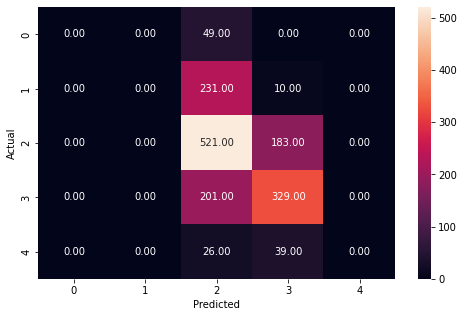

In [22]:
## Model for SVM:
## Note, as discussed in the class we will build a model but need to determine the correct
## Tuning parameters.  To do this, we will use GridSearch Cross Validation and provide it a 
## Range of parameters to evaluate.  It will then return the model with the best parameters
## and we will then mearure the efficenty of this model against the test data

## Tuning Parameters to evaluate.
param_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 20, 30, 35]}
svc_grid_model = SVC(random_state = 42, kernel='linear')
svc_grid = GridSearchCV( svc_grid_model, param_grid = param_svc)

svc_grid.fit(x_traning_scalar , y_train)

## Output the optimal C value
print(bcolors.RED + "\nSVM Best Parameters:" + bcolors.ENDC, svc_grid.best_params_)

## Get prediction results and provide to metrics score
y_pred_svc= svc_grid.predict(x_test_scalar)
metrics_score(y_test, y_pred_svc)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_leaf_nodes': [4, 6, 8],
                         'min_samples_split': [2, 3, 5],
                         'n_estimators': [10, 20, 50]})


Random Forest Best Parameters: {'criterion': 'gini', 'max_leaf_nodes': 8, 'min_samples_split': 2, 'n_estimators': 20}


RandomForestClassifier(max_depth=10, max_leaf_nodes=8, n_estimators=50,
                       random_state=42)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        49
           1       0.52      0.07      0.12       241
           2       0.51      0.80      0.62       704
           3       0.64      0.56      0.60       530
           4       0.00      0.00      0.00        65

    accuracy                           0.55      1589
   macro avg       0.33      0.29      0.27      1589
weighted avg       0.52      0.55      0.49      1589



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


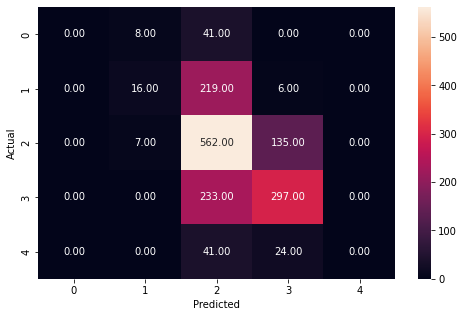

In [23]:
## Model for Random Forest:
## Again we will use GridSearch Cross Validation to evaluate the optimal tuning parameters for the Random
## Forest and will evaluate the performance of the model

param = {'n_estimators': [10, 20, 50], 'min_samples_split': [2, 3, 5], 'criterion': ('gini', 'entropy'), 'max_leaf_nodes': [4, 6, 8]}

rf_grid_model = RandomForestClassifier(random_state = 42)
rf_grid = GridSearchCV( rf_grid_model, param_grid = param)

rf_grid.fit(x_traning_scalar , y_train)

print(bcolors.RED + "\nRandom Forest Best Parameters:" + bcolors.ENDC, rf_grid.best_params_)

rf = RandomForestClassifier(n_estimators=50, max_depth=10, min_samples_split=2, max_leaf_nodes=8, criterion='gini', random_state = 42)
rf.fit(x_traning_scalar , y_train)

y_pred_rf = rf.predict(x_test_scalar)
metrics_score(y_test, y_pred_rf)

# **Part C Summary**

One of the first issues I identified after doing this was that there was a pretty heavy class in balance with this data set.  In the first part of EDA I discovered that class 2 and 3 represent about 80% of the data which is a pretty high inbalance

# **Training Data**

***Class -- Percentage***

2 --   43.36%

3  --  32.78%

# **Test Data**

***Class -- Percentage***

2 --   44.31 %

3 --   33.35 %


# **Comparason Between SVM and Random Forest**

***Accuracy***

The accuracy of the SVM was 53% and Random Forest was 55%.  The Random Forest performed slightly better but only marginally.


***Classification***

If we look at Class 1, the SVM was unable to predict any of the test data correctly; however, the Random Forest was able to atleast 16 instances of class 1 correctly

When looking at Class 2, the Random Forest wa able to correctly predict the test data a little bit better compared to SVM (Random Forest: 562, SVM: 521)

When looking at Class 3, the SVM performed better than the Random Forest as SVM was able to correctly predict: 329 vs Random Forest was able to correctly predict: 297.

Overall the both models performed well considering the challenges with the data.  I believe the Random Forest performed slightly better as its accuracy and prediction for Class 1 and 2 was better vs SVM.


## **Part D** <font color="blue">(3 points)</font>

1. **<font color="blue">(1 point)</font>** Generate $2$-dimentional data with $500$ observations from $3$ Gaussian clusters. 
2. **<font color="blue">(0.5 points)</font>** Use a scatterplot to visualize the produced data. 
3. **<font color="blue">(1 point)</font>** Shuffle the data and use $K$-means, with $K=2,3,4$ to cluster the data.
4. **<font color="blue">(0.5 points)</font>** Visualize the results, separately.  


In [24]:
# Part D: Question 1: Generate  2 -dimentional data with  500  observations from  3  Gaussian clusters.
mean_d1 = [0, 0]
mean_d2 = [5, 5]
mean_d3 = [10,10]
cov = [[2, 1], [1, 2]] 
x1, y1 = np.random.multivariate_normal(mean_d1, cov, 500).T
x2, y2 = np.random.multivariate_normal(mean_d2, cov, 500).T
x3, y3 = np.random.multivariate_normal(mean_d3, cov, 500).T


Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

Text(0.5, 0.98, 'Illustration of three gaussian distributions (with and without labels)')

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

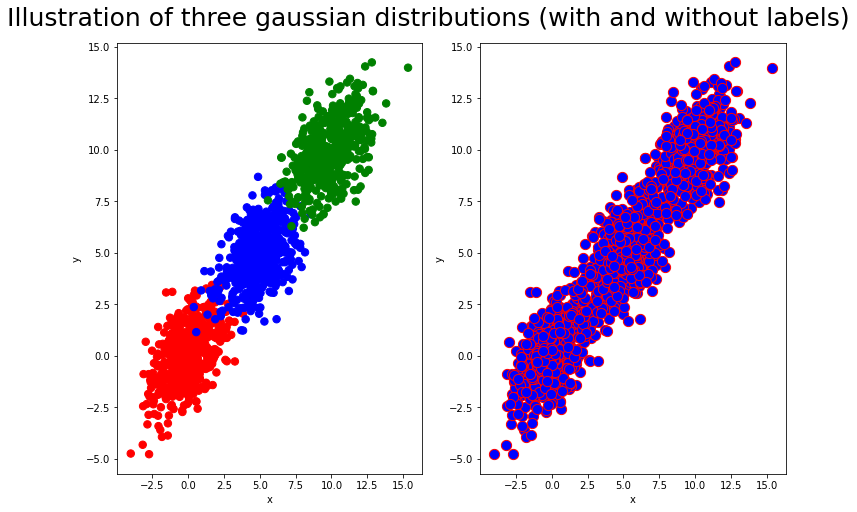

In [25]:
# Part D: Question 2: Use a scatterplot to visualize the produced data.

color = np.array(["red" for i in range(500)]+["blue" for i in range(500)]+["green" for i in range(500)]) 

# Hide our labels
x = np.concatenate((x1,x2,x3),axis=0)
y = np.concatenate((y1,y2, y3),axis=0)

data = pd.DataFrame(data=np.hstack((x.reshape(-1,1), y.reshape(-1,1))),columns=['x','y'])

## Build the scatter plot
fig, axs = plt.subplots(1, 2, constrained_layout=True, figsize=(10,7))

axs[0].scatter([x1,x2,x3], [y1,y2,y3],color=color,s=220, marker=".")
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
fig.suptitle('Illustration of three gaussian distributions (with and without labels)', fontsize=25)

colors = ["red", "blue", "green", "m"]

axs[1].scatter(x,y, c="blue", s=420, marker=".", edgecolors = "red")
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
plt.show()

[0 0 0 ... 1 1 1]
The centroids associated with the clusters are: [[1.61591425 1.62359124]
 [8.86797272 8.89957715]]
[2 2 2 ... 0 0 0]
The centroids associated with the clusters are: [[ 9.98933139 10.01017014]
 [ 5.03019046  4.97572141]
 [-0.01504981  0.07434273]]
[0 0 0 ... 1 1 1]
The centroids associated with the clusters are: [[-0.43474244 -0.33077414]
 [10.06973412 10.08785126]
 [ 2.63410426  2.54466827]
 [ 5.50921479  5.49804517]]


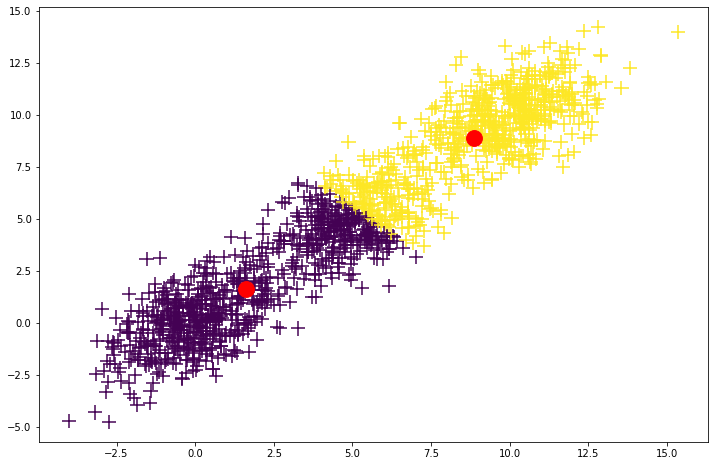

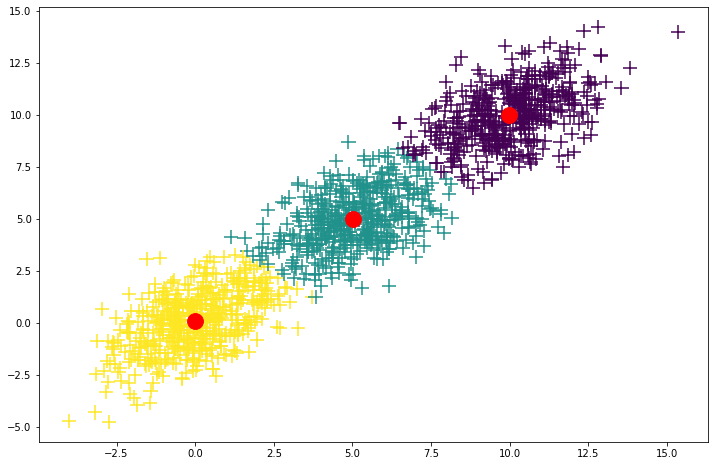

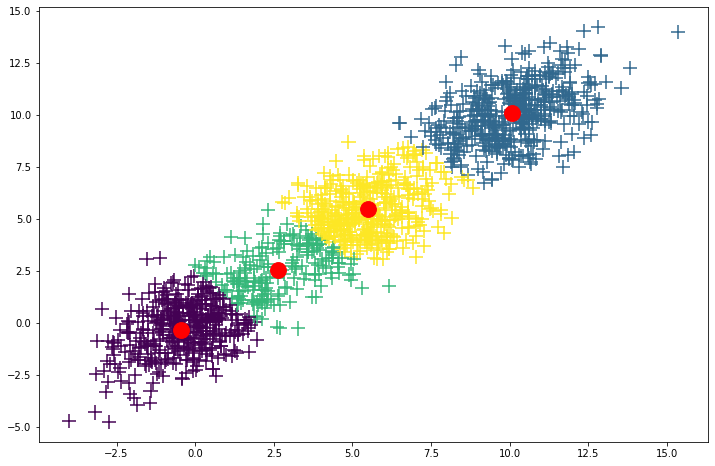

In [26]:
# Part D: Question 3 and 4: 
# i. Shuffle the data and use  𝐾 -means, with  𝐾=2,3,4  to cluster the data
# ii. Visualize the data

## The following is a function which will create the clusters and visualize the data
def shuffle_data_kmeans(d, n_clusters):
  # Number of clusters
  kmeans = KMeans(n_clusters=n_clusters)
  # Fitting the input data
  kmeans = kmeans.fit(d)
  # Getting the cluster labels
  labels = kmeans.predict(d)

  print( labels)

  centroids = kmeans.cluster_centers_
  # Comparing with scikit-learn centroids
  print('The centroids associated with the clusters are:', centroids) # From sci-kit learn

  figsize = plt.figure(figsize = (12,8))
  plot = plt.scatter(x, y, c= labels, s=200, marker = "+") 
  plot = plt.scatter(centroids[:,0], centroids[:,1], c='red', s=1000, marker = ".") # marker: shape of points


num_clusters = [2,3,4]

for n in num_clusters:
  shuffle_data_kmeans(data, n)



AttributeError: ignored

TypeError: ignored

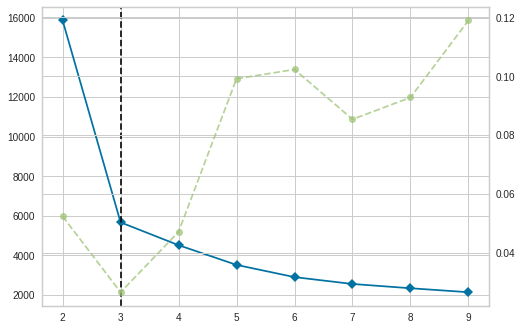

In [ ]:
# Part D: Question 4 Additional: 

from sklearn.cluster import KMeans
#from sklearn.datasets import make_blobs
# https://www.scikit-yb.org/en/latest/api/cluster/elbow.html
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))

## Note to Marker:
## I reviewed this with Arbaaz during the coding part on Thursday.  Arbaaz was getting the same
## Error as I was but we were unable to resolve the the issue.  I know this generates an error; however, 
## It does generate a plot at the end.  I put my comments about which value for the cluster below.


visualizer.fit(X)  

visualizer.show()

**Part D: Summary**

To determine the appropriate cluster I looked at two different methods to determine the optimal k for the K-Means.  The first method was to build a scatter plot for the different clusters and look at the optimal cluster.  Based on the scatter plot I would believe that 3 would be the optimal separation for the clusters.  I also did a K-Elbow to look at the optimum cluster size.  Based on the graph above it looks like the optimal cluster is 3 a close second.  Based on the Elbow curve and the scatter plot, my recommendation is use a cluster of 3 as I believe that is visually separates the data better. 